# Evaluating prediction performance

In [1]:
library(ROCR)
library(PRROC)
library(magrittr)

Loading required package: gplots

Attaching package: ‘gplots’

The following object is masked from ‘package:stats’:

    lowess



## Read results

In [2]:
results = readr::read_tsv("pred_res_for_roc.tsv")

Parsed with column specification:
cols(
  .default = col_double(),
  chemical_id = col_character(),
  disease_id = col_character(),
  origin = col_character(),
  category = col_character(),
  true_label = col_integer()
)
See spec(...) for full column specifications.


In [3]:
dim(results)

[1] 16786   113

In [4]:
head(results)

chemical_id,disease_id,origin,prior_logit,prior_prob,degree_CbG,degree_CcSE,degree_CdG,degree_CiPC,degree_CrC,⋯,dwpc_CuGaDuGaD,dwpc_CuGbCtDrD,dwpc_CuGcGiGaD,dwpc_CuGdDpSpD,dwpc_CuGuCbGaD,dwpc_CuGuCtDrD,dwpc_CuGuCuGaD,predicted_value,category,true_label
DB00884,DOID:11476,holdout,-3.825,0.021360,-1.3940,0.41320,-0.9711,0.2821,0.3077,⋯,-0.6400,-0.3452,-0.58260,-0.6257,-0.72180,-0.6438,-0.67800,0.9724294,DM,1
DB00630,DOID:5408,holdout,-4.845,0.007803,-0.4395,0.07669,0.3352,0.2821,0.4233,⋯,0.2171,2.2980,-0.18080,-0.3926,-0.61750,0.4045,-0.13560,0.9464362,DM,1
DB01014,DOID:8577,holdout,-3.913,0.019600,-0.6787,-3.12500,1.1010,0.2821,0.3077,⋯,0.5635,-0.3452,-0.33800,0.8360,0.47970,-0.5279,0.09699,0.9040739,DM,1
DB00630,DOID:11476,holdout,-3.825,0.021360,-0.4395,0.07669,0.3352,0.2821,0.4233,⋯,1.5560,-0.3452,0.02615,0.4802,0.91600,-0.1673,0.24980,0.8789891,NA,0
DB00563,DOID:1324,holdout,-0.542,0.367700,1.5540,0.82370,1.7910,0.2821,0.3077,⋯,2.2690,3.5220,2.55200,2.7580,2.67000,2.1650,2.58500,0.8738866,NA,0
DB00795,DOID:8778,holdout,-3.673,0.024780,0.7577,-3.12500,0.1270,0.2821,0.3077,⋯,0.5355,3.4120,-0.01673,-0.6257,0.09161,-0.0471,0.13180,0.8592812,DM,1


---

## ROC curve

In [5]:
good <- subset(results, true_label == 1)$predicted_value
bad <- subset(results, true_label == 0)$predicted_value

In [6]:
roc <- roc.curve(scores.class0 = good, scores.class1 = bad, curve = T)

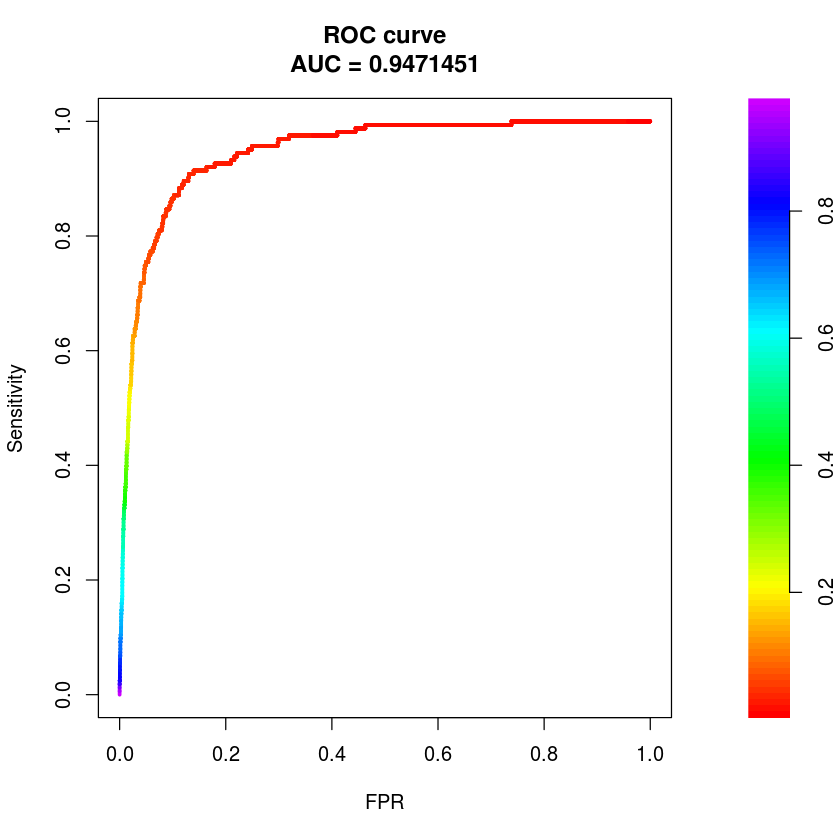

In [7]:
plot(roc)

In [8]:
roc$auc

[1] 0.9471451

In [9]:
write(sprintf("auc_roc:%s", roc$auc), file = "cval_scores.txt")

## Precision Recall curve

In [10]:
pr <- pr.curve(scores.class0 = good, scores.class1 = bad, curve = T)

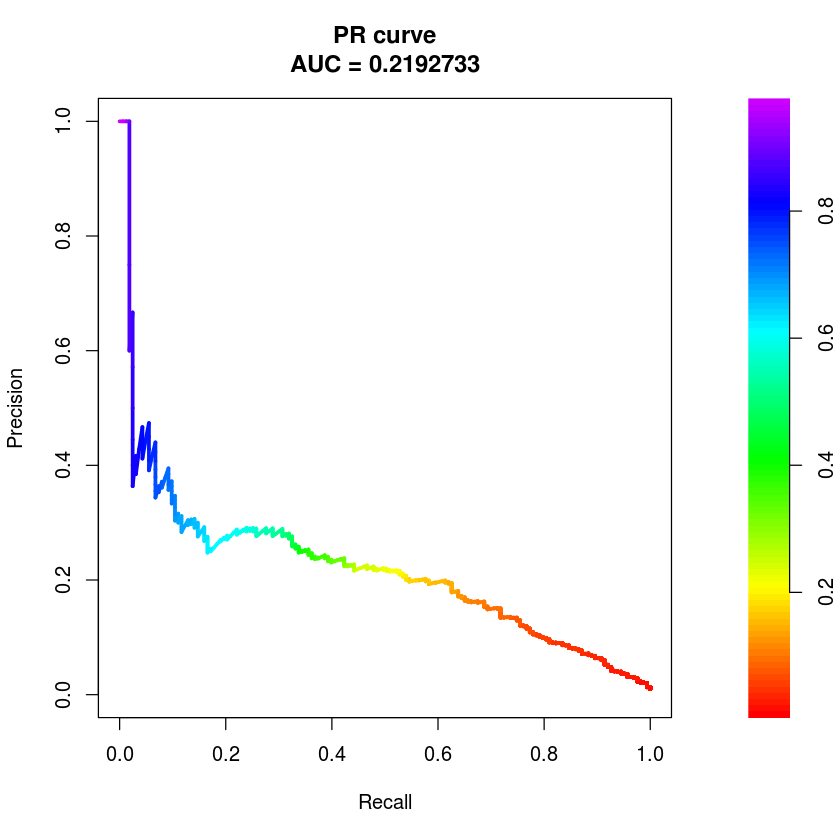

In [11]:
plot(pr)

In [12]:
pr$auc.integral

[1] 0.2192733

In [13]:
write(sprintf("auc_pr:%s", pr$auc.integral), file = "cval_scores.txt", append = T)